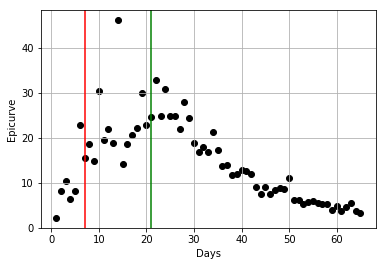

In [1]:
%matplotlib inline
import ssl
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plotter

################# RETRIEVE
ssl._create_default_https_context = ssl._create_unverified_context
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
data = pd.read_csv(url)

################# MANIPULATE
tc = data['totale_casi']
tt = data['tamponi']
x=[]
y=[]
tt_increase = []
for i in range(1,len(tt)):
    dy = tc[i] - tc[i-1]
    dx = tt[i] - tt[i-1]
    current_epi = (dy/dx) * 100
    tt_increase.append(dx)
    x.append(i)
    y.append(current_epi)

################# PLOT

restriction_day = 7
effects_day = 21

plotter.scatter(x,y,color='black')

plotter.axvline(restriction_day,0,100,color='red')
plotter.axvline(effects_day,0,100,color='green')

plotter.grid()
plotter.xlabel('Days')
plotter.ylabel('Epicurve')

plotter.show()

In [2]:
################## PREDICT

from scipy import stats



x1 = np.array(x[50:])
y1 = np.array(y[50:])

#plotter.scatter(x1,y1)

print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
[2.1632937892533146, 8.091286307053942, 10.300782859497321, 6.465634338494974, 8.091706001348618, 22.952149229521492, 15.419296663660957, 18.558343289526086, 14.745038934940968, 30.455445544554454, 19.46459844883663, 21.86568472733649, 18.946031746031746, 46.207251221393676, 14.087959625090122, 18.663761801016705, 20.619117990199893, 22.19221050797247, 29.934942646807055, 22.824082904189712, 24.749291893133275, 32.96867695184666, 24.917081260364842, 30.877233696913436, 24.828902069766478, 24.8974787363305, 22.081016679904685, 28.061643032930974, 24.418496464458503, 18.95855318219861, 16.804588283490375, 18.047184954117327, 16.853330324145908, 21.290401567091088, 17.360366925286126, 13.688405552365834, 13.878972572921203, 11.72599160993745

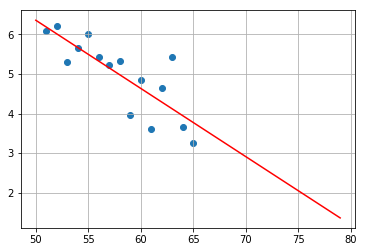

R value: 0.65
Zero contagion on day: 87


In [3]:
slope, intercept, rv, pv, err = stats.linregress(x1,y1)

def predict(x):
    return x * slope + intercept

x = range(50,80)
yp = predict(x)

plotter.scatter(x1,y1)
plotter.plot(x,yp,c='r')
plotter.grid()
plotter.show()

zero = - (intercept/slope)
print("R value: " + str(round(rv ** 2,2)))
print("Zero contagion on day: " + str(int(round(zero))))
